Run the CO2 emission-based models with SSP scenarios

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random
import pandas as pd

import fair
from matplotlib import pyplot as plt
from fair.forward2 import fair_scm
from fair.forward import fair_scm
from fair.forward3 import fair_scm


In [3]:
SSPs = pd.read_csv("/Users/michelledvorak/Documents/2020 RA'ship/SSP_CO2 emissions.csv")

In [4]:
# SSPs

In [5]:
SSP = SSPs.copy()
SSP['Year'] = pd.to_datetime(SSP['Year'], format = '%Y')
SSP.index = SSP['Year']
del SSP['Year']

In [6]:
SSP_copy = SSP.resample('Y').mean()
# SSP_copy

In [7]:
SSP_copy['SSP 1-19'] = SSP_copy['SSP 1-19'].interpolate()
SSP_copy['SSP1-26'] = SSP_copy['SSP1-26'].interpolate()
SSP_copy['SSP2-45'] = SSP_copy['SSP2-45'].interpolate()
SSP_copy['SSP3-70 (baseline)'] = SSP_copy['SSP3-70 (baseline)'].interpolate()
SSP_copy['SSP3-LowNTCF'] = SSP_copy['SSP3-LowNTCF'].interpolate()
SSP_copy['SSP4-34'] = SSP_copy['SSP4-34'].interpolate()
SSP_copy['SSP4-60'] = SSP_copy['SSP4-60'].interpolate()
SSP_copy['SSP5-34-OS'] = SSP_copy['SSP5-34-OS'].interpolate()
SSP_copy['SSP5-85 (Baseline)'] = SSP_copy['SSP5-85 (Baseline)'].interpolate()

SSP_copy

,SSP 1-19,SSP1-26,SSP2-45,SSP3-70 (baseline),SSP3-LowNTCF,SSP4-34,SSP4-60,SSP5-34-OS,SSP5-85 (Baseline)
Year,,,,,,,,,
2015-12-31,39152.7260,39152.7260,39148.7580,39148.7580,39148.7580,39152.7260,39152.7260,39152.7260,39152.7260
2016-12-31,39260.9260,39282.9834,39448.5124,40280.6140,40287.9448,39137.4448,39137.4452,40064.7066,40064.6506
2017-12-31,39369.1260,39413.2408,39748.2668,41412.4700,41427.1316,39122.1636,39122.1644,40976.6872,40976.5752
2018-12-31,39477.3260,39543.4982,40048.0212,42544.3260,42566.3184,39106.8824,39106.8836,41888.6678,41888.4998
2019-12-31,39585.5260,39673.7556,40347.7756,43676.1820,43705.5052,39091.6012,39091.6028,42800.6484,42800.4244
2020-12-31,39693.7260,39804.0130,40647.5300,44808.0380,44844.6920,39076.3200,39076.3220,43712.6290,43712.3490
2021-12-31,38009.0805,39297.0541,40930.3833,45611.9701,45664.8437,38614.6179,39685.4811,44871.3678,44870.7724
2022-12-31,36324.4350,38790.0952,41213.2366,46415.9022,46484.9954,38152.9158,40294.6402,46030.1066,46029.1958
2023-12-31,34639.7895,38283.1363,41496.0899,47219.8343,47305.1471,37691.2137,40903.7993,47188.8454,47187.6192


In [8]:
SSP1_19 = np.array(SSP_copy['SSP 1-19']/1000/3.664)
SSP1_26 = np.array(SSP_copy['SSP1-26']/1000/3.664)
SSP2_45 = np.array(SSP_copy['SSP2-45']/1000/3.664)
SSP3_70 = np.array(SSP_copy['SSP3-70 (baseline)']/1000/3.664)
SSP4_34 = np.array(SSP_copy['SSP4-34']/1000/3.664)
SSP4_60 = np.array(SSP_copy['SSP4-60']/1000/3.664)
SSP5_34 = np.array(SSP_copy['SSP5-34-OS']/1000/3.664)
SSP5_85 = np.array(SSP_copy['SSP5-85 (Baseline)']/1000/3.664)
SSP5_34 = np.array(SSP_copy['SSP5-34-OS']/1000/3.664)

In [10]:
other_rf = np.zeros(SSP1_19.size)

C119, F119, T119 = fair.forward.fair_scm(emissions=SSP1_19, other_rf=other_rf, useMultigas=False)
C126, F126, T126 = fair.forward.fair_scm(emissions=SSP1_26, other_rf=other_rf, useMultigas=False)
C245, F245, T245 = fair.forward.fair_scm(emissions=SSP2_45, other_rf=other_rf, useMultigas=False)
C370, F370, T370 = fair.forward.fair_scm(emissions=SSP3_70, other_rf=other_rf, useMultigas=False)
C434, F434, T434 = fair.forward.fair_scm(emissions=SSP4_34, other_rf=other_rf, useMultigas=False)
C460, F460, T460 = fair.forward.fair_scm(emissions=SSP4_60, other_rf=other_rf, useMultigas=False)
C534, F534, T534 = fair.forward.fair_scm(emissions=SSP5_34, other_rf=other_rf, useMultigas=False)
C585, F585, T585 = fair.forward.fair_scm(emissions=SSP5_85, other_rf=other_rf, useMultigas=False)

C119_2, F119_2, T119_2 = fair.forward2.fair_scm(emissions=SSP1_19, other_rf=other_rf, useMultigas=False)
C126_2, F126_2, T126_2 = fair.forward2.fair_scm(emissions=SSP1_26, other_rf=other_rf, useMultigas=False)
C245_2, F245_2, T245_2 = fair.forward2.fair_scm(emissions=SSP2_45, other_rf=other_rf, useMultigas=False)
C370_2, F370_2, T370_2 = fair.forward2.fair_scm(emissions=SSP3_70, other_rf=other_rf, useMultigas=False)
C434_2, F434_2, T434_2 = fair.forward2.fair_scm(emissions=SSP4_34, other_rf=other_rf, useMultigas=False)
C460_2, F460_2, T460_2 = fair.forward2.fair_scm(emissions=SSP4_60, other_rf=other_rf, useMultigas=False)
C534_2, F534_2, T534_2 = fair.forward2.fair_scm(emissions=SSP5_34, other_rf=other_rf, useMultigas=False)
C585_2, F585_2, T585_2 = fair.forward2.fair_scm(emissions=SSP5_85, other_rf=other_rf, useMultigas=False)


Text(0, 0.5, 'Temperature anomaly (K)')

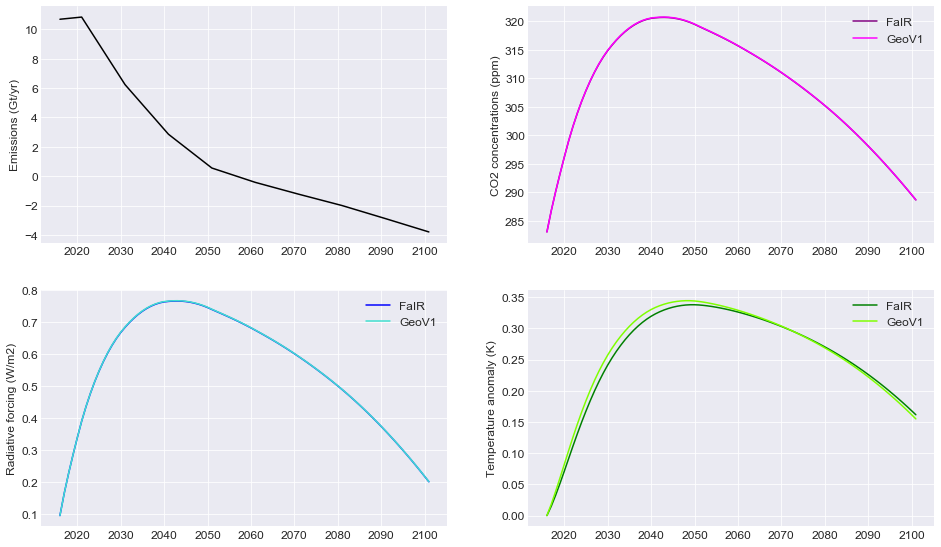

In [12]:

plt.rcParams['font.size'] = 12
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = (16, 20)

fig = plt.figure()
ax1 = fig.add_subplot(421)
ax1.plot(SSP_copy.index, SSP1_19, color='black')
ax1.set_ylabel('Emissions (Gt/yr)')
ax2 = fig.add_subplot(422)
ax2.plot(SSP_copy.index, C119, color='purple', label='FaIR')
ax2.plot(SSP_copy.index, C119_2, color='magenta', label='GeoV1')
ax2.legend()
ax2.set_ylabel('CO2 concentrations (ppm)')
ax3 = fig.add_subplot(423)
ax3.plot(SSP_copy.index, F119, color='blue', label='FaIR')
ax3.plot(SSP_copy.index, F119_2, color='turquoise', label='GeoV1')
ax3.legend()
ax3.set_ylabel('Radiative forcing (W/m2)')
ax4 = fig.add_subplot(424)
ax4.plot(SSP_copy.index, T119, color='green', label='FaIR')
ax4.plot(SSP_copy.index, T119_2, color='chartreuse', label='GeoV1')
ax4.legend()
ax4.set_ylabel('Temperature anomaly (K)')


Text(0, 0.5, 'Temperature anomaly (K)')

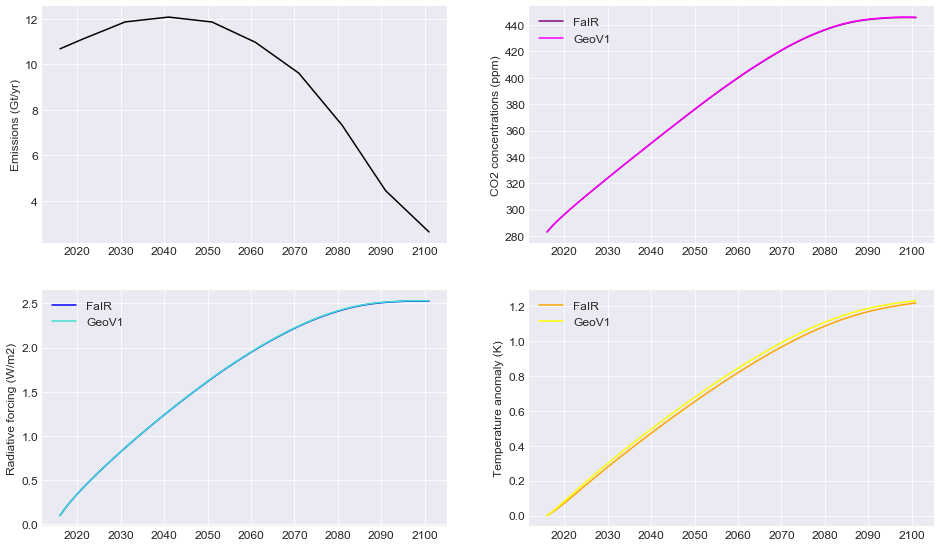

In [13]:
fig = plt.figure()

ax1 = fig.add_subplot(421)
ax1.plot(SSP_copy.index, SSP2_45, color='black')
ax1.set_ylabel('Emissions (Gt/yr)')
ax2 = fig.add_subplot(422)
ax2.plot(SSP_copy.index, C245, color='purple', label='FaIR')
ax2.plot(SSP_copy.index, C245_2, color='magenta', label='GeoV1')
ax2.legend()
ax2.set_ylabel('CO2 concentrations (ppm)')
ax3 = fig.add_subplot(423)
ax3.plot(SSP_copy.index, F245, color='blue', label='FaIR')
ax3.plot(SSP_copy.index, F245_2, color='turquoise', label='GeoV1')
ax3.legend()
ax3.set_ylabel('Radiative forcing (W/m2)')
ax4 = fig.add_subplot(424)
ax4.plot(SSP_copy.index, T245, color='orange', label='FaIR')
ax4.plot(SSP_copy.index, T245_2, color='yellow', label='GeoV1')
ax4.legend()
ax4.set_ylabel('Temperature anomaly (K)')

Text(0, 0.5, 'Temperature anomaly (K)')

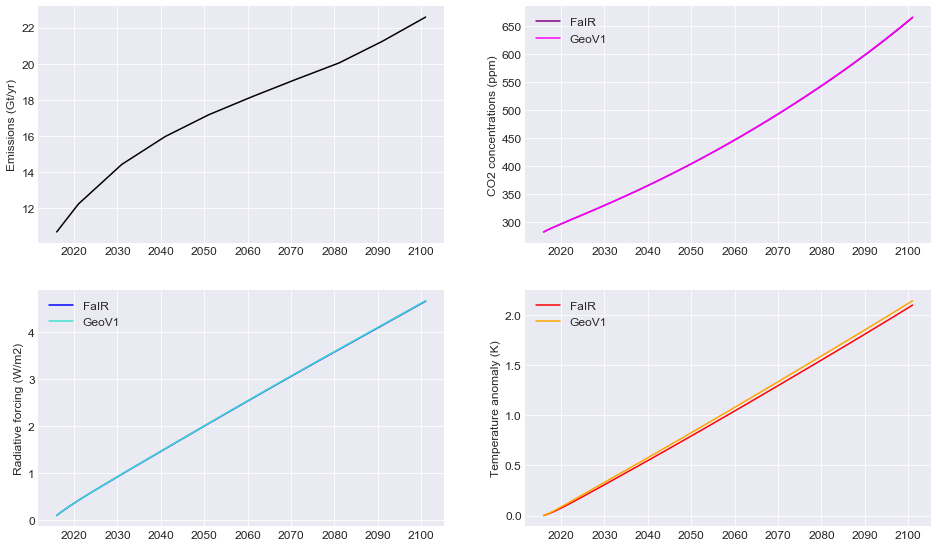

In [14]:
fig = plt.figure()
ax1 = fig.add_subplot(421)
ax1.plot(SSP_copy.index, SSP3_70, color='black')
ax1.set_ylabel('Emissions (Gt/yr)')
ax2 = fig.add_subplot(422)
ax2.plot(SSP_copy.index, C370, color='purple', label='FaIR')
ax2.plot(SSP_copy.index, C370_2, color='magenta', label='GeoV1')
ax2.legend()
ax2.set_ylabel('CO2 concentrations (ppm)')
ax3 = fig.add_subplot(423)
ax3.plot(SSP_copy.index, F370, color='blue', label='FaIR')
ax3.plot(SSP_copy.index, F370_2, color='turquoise', label='GeoV1')
ax3.legend()
ax3.set_ylabel('Radiative forcing (W/m2)')
ax4 = fig.add_subplot(424)
ax4.plot(SSP_copy.index, T370, color='red', label='FaIR')
ax4.plot(SSP_copy.index, T370_2, color='orange', label='GeoV1')
ax4.legend()
ax4.set_ylabel('Temperature anomaly (K)')

Text(0, 0.5, 'Temperature anomaly (K)')

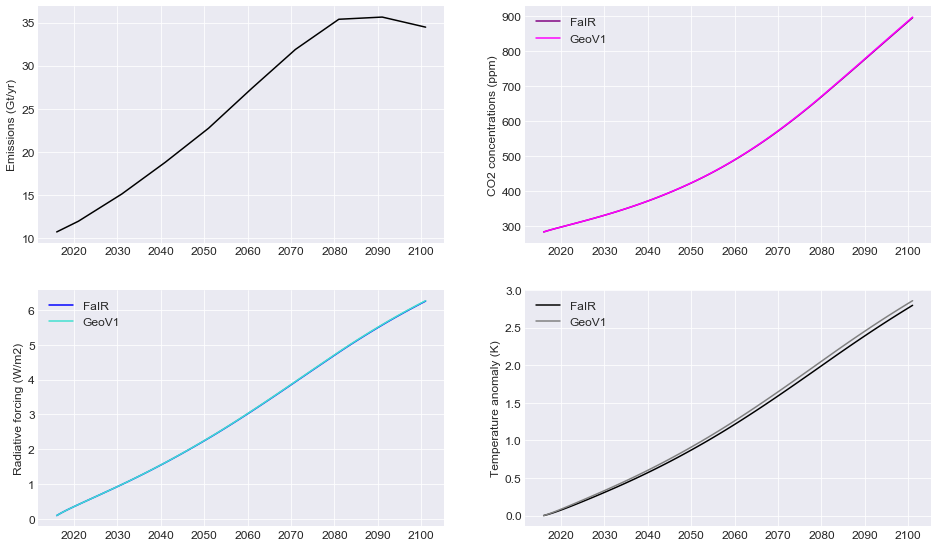

In [15]:
fig = plt.figure()
ax1 = fig.add_subplot(421)
ax1.plot(SSP_copy.index, SSP5_85, color='black')
ax1.set_ylabel('Emissions (Gt/yr)')
ax2 = fig.add_subplot(422)
ax2.plot(SSP_copy.index, C585, color='purple', label='FaIR')
ax2.plot(SSP_copy.index, C585_2, color='magenta', label='GeoV1')
ax2.legend()
ax2.set_ylabel('CO2 concentrations (ppm)')
ax3 = fig.add_subplot(423)
ax3.plot(SSP_copy.index, F585, color='blue', label='FaIR')
ax3.plot(SSP_copy.index, F585_2, color='turquoise', label='GeoV1')
ax3.legend()
ax3.set_ylabel('Radiative forcing (W/m2)')
ax4 = fig.add_subplot(424)
ax4.plot(SSP_copy.index, T585, color='black', label='FaIR')
ax4.plot(SSP_copy.index, T585_2, color='grey', label='GeoV1')
ax4.legend()
ax4.set_ylabel('Temperature anomaly (K)')

Text(0, 0.5, 'Temperature anomaly (K)')

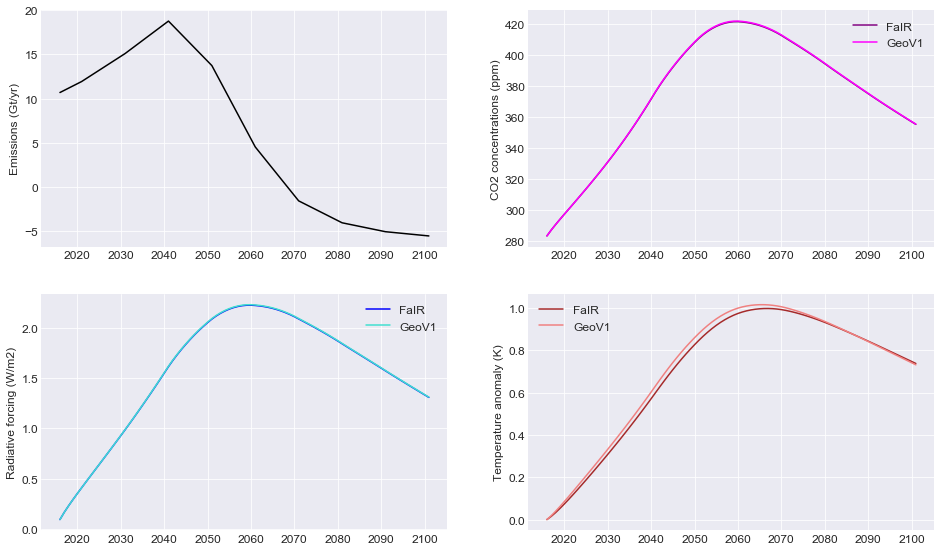

In [16]:
fig = plt.figure()
ax1 = fig.add_subplot(421)
ax1.plot(SSP_copy.index, SSP5_34, color='black')
ax1.set_ylabel('Emissions (Gt/yr)')
ax2 = fig.add_subplot(422)
ax2.plot(SSP_copy.index, C534, color='purple', label='FaIR')
ax2.plot(SSP_copy.index, C534_2, color='magenta', label='GeoV1')
ax2.legend()
ax2.set_ylabel('CO2 concentrations (ppm)')
ax3 = fig.add_subplot(423)
ax3.plot(SSP_copy.index, F534, color='blue', label='FaIR')
ax3.plot(SSP_copy.index, F534_2, color='turquoise', label='GeoV1')
ax3.legend()
ax3.set_ylabel('Radiative forcing (W/m2)')
ax4 = fig.add_subplot(424)
ax4.plot(SSP_copy.index, T534, color='brown', label='FaIR')
ax4.plot(SSP_copy.index, T534_2, color='lightcoral', label='GeoV1')
ax4.legend()
ax4.set_ylabel('Temperature anomaly (K)')